# Optimization of Employee Shuttle Stops


## Goal

It is a common practice for tech companies to use shuttle buses to ferry their employees from home to the office.
The goal of this exercise is to figure out the optimal stops for a bus shuttle. The company is based in Mountain View and the shuttle provides transportation form employees based in San Francisco.

With the explosion of location and user data, data science can be used to optimize many of the services cities offer to their citizens. Transportation optimization is an example of that, but there are so many other possible applications. All this often goes under the name of “smart city” and it is one of the most interesting future applications of data science.


## Challenge Description


Company XYZ has decided to offer a shuttle bus to help its employees commute from San Francisco to Mountain View.
The city of San Francisco has given the company a list of potential bus stop locations to choose from and asked to not have more than 10 stops within the city.

You have been given the home address of all employees interested in taking the shuttle and asked to come up with the ten most efficient stops.

While you have been given a certain freedom in defining what is “efficient”, the general consensus within the company is that the most efficient way to select the bus stops is to minimize the overall walking distance between employee homes and the 10 bus stops.

Estimating all possible 10 stop combinations would require a lot of time (how many combinations would that be?). Therefore, your boss is fine with simplifying the problem and returning 10 stops that have a high probability of being the best stops.

You should write an algorithm that returns the best 10 stops in your opinion. Also, please explain the rationale behind the algorithm.


In [1]:
ls

14_Employee_Shuttle_Stops.ipynb  Employee_Addresses.csv
Bus_Stops.csv                    my_map.html


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_stop = pd.read_csv('Bus_Stops.csv')
print(df_stop.shape)
df_stop.head()

(119, 2)


,Street_One,Street_Two
0,MISSION ST,ITALY AVE
1,MISSION ST,NEW MONTGOMERY ST
2,MISSION ST,01ST ST
3,MISSION ST,20TH ST
4,MISSION ST,FREMONT ST


Potential_Bus_Stops - this is the list of potential bus stops given by San Francisco to the company. It is a list of intersections in the city.

Columns:

- Street_One : one of the two streets intersecting
- Street_Two : the other street intersecting

In [4]:
df_employee = pd.read_csv('Employee_Addresses.csv')
print(df_employee.shape)
df_employee.head()

(2191, 2)


,address,employee_id
0,"98 Edinburgh St, San Francisco, CA 94112, USA",206
1,"237 Accacia St, Daly City, CA 94014, USA",2081
2,"1835 Folsom St, San Francisco, CA 94103, USA",178
3,"170 Cambridge St, San Francisco, CA 94134, USA",50
4,"16 Roanoke St, San Francisco, CA 94131, USA",1863


Employee_Addresses - the home address of each employee interested in taking the shuttle.

Columns:

- address : employee address

- employee_id : employee id, unique by employee

In [5]:
len(df_employee.address.unique())

1761

In [6]:
print(len(list(df_employee.address)))
print(len(list(set(df_employee.address))))

employee_address = list(set(df_employee.address))

2191
1761


In [7]:
employee_address[:20]

['55 9th St, San Francisco, CA 94103, USA',
 '121 Accacia St, Daly City, CA 94014, USA',
 '313 Potrero Ave, San Francisco, CA 94103, USA',
 '18 Alexander Ave, Daly City, CA 94014, USA',
 '2077 Thomas Ave, San Francisco, CA 94124, USA',
 '411 Vienna St, San Francisco, CA 94112, USA',
 '128 Elmira St, San Francisco, CA 94124, USA',
 '165 Burnside Ave, San Francisco, CA 94131, USA',
 '2 Maynard St, San Francisco, CA 94112, USA',
 '131 Winchester St, Daly City, CA 94014, USA',
 '198 Church St, San Francisco, CA 94114, USA',
 '331 Gambier St, San Francisco, CA 94134, USA',
 '170 Madison St, San Francisco, CA 94134, USA',
 '1254 Naples St, San Francisco, CA 94112, USA',
 '1198 San Jose Avenue, San Francisco, CA 94131, USA',
 '105 Cambridge St, San Francisco, CA 94134, USA',
 '2900 Geneva Ave, Daly City, CA 94014, USA',
 '199 Bayshore Blvd, San Francisco, CA 94124, USA',
 '190 Madison St, San Francisco, CA 94134, USA',
 '35 Fell St, San Francisco, CA 94102, USA']

### Step up google map API

instruction:

https://github.com/googlemaps/google-maps-services-python

$ pip3 install -U googlemaps

how to get started

https://developers.google.com/maps/gmp-get-started



In [8]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='****************************')

In [9]:
stop_address = []

for i in range(df_stop.shape[0]):
    #print(i,df_stop.Street_One[i] + ' & '+ df_stop.Street_Two[i])
    stop_address.append(df_stop.Street_One[i] + ' & '+ df_stop.Street_Two[i]+ ', CA')
    
stop_address

['MISSION ST & ITALY AVE, CA',
 'MISSION ST & NEW MONTGOMERY ST, CA',
 'MISSION ST & 01ST ST, CA',
 'MISSION ST & 20TH ST, CA',
 'MISSION ST & FREMONT ST, CA',
 'MISSION ST & 13TH ST, CA',
 'MISSION ST & ERIE ST, CA',
 'MISSION ST & BEALE ST, CA',
 'MISSION ST & FAIR AVE, CA',
 'MISSION ST & SAINT MARYS AVE, CA',
 'MISSION ST & SENECA AVE, CA',
 'MISSION ST & ANTHONY ST, CA',
 'MISSION ST & JESSIE EAST ST, CA',
 'MISSION ST & SILVER AVE, CA',
 'MISSION ST & MOUNT VERNON AVE, CA',
 'MISSION ST & 30TH ST, CA',
 'MISSION ST & MAIN ST, CA',
 'MISSION ST & TRUMBULL ST, CA',
 'MISSION ST & 15TH ST, CA',
 'MISSION ST & KINGSTON ST, CA',
 'MISSION ST & TINGLEY ST, CA',
 'MISSION ST & THERESA ST, CA',
 'MISSION ST & PARK ST, CA',
 'MISSION ST & OLIVER ST, CA',
 'MISSION ST & STEUART ST, CA',
 'MISSION ST & HURON AVE, CA',
 'MISSION ST & SYCAMORE ST, CA',
 'MISSION ST & 02ND ST, CA',
 'MISSION ST & MINT ST, CA',
 'MISSION ST & GENEVA AVE, CA',
 'MISSION ST & CORTLAND AVE, CA',
 'MISSION ST & 22N

In [10]:
stop_address_dict = {}

number = 0
for address in stop_address:
    geocode_result = gmaps.geocode(address)
    lat = geocode_result[0]['geometry']['location']['lat']
    long = geocode_result[0]['geometry']['location']['lng']
    
    stop_address_dict[address] = [lat,long]
    
    if (number % 10 == 0):
        print(number,address,[lat,long])
    number +=1

0 MISSION ST & ITALY AVE, CA [37.7184779, -122.4395356]
10 MISSION ST & SENECA AVE, CA [37.7176754, -122.4401492]
20 MISSION ST & TINGLEY ST, CA [37.7282519, -122.431806]
30 MISSION ST & CORTLAND AVE, CA [37.7410375, -122.4228531]
40 MISSION ST & WHIPPLE AVE, CA [37.7107534, -122.4477074]
50 MISSION ST & 11TH ST, CA [37.7743325, -122.4171372]
60 MISSION ST & CLARION ALY, CA [37.7630637, -122.4195044]
70 MISSION ST & LAWRENCE AVE, CA [37.7094211, -122.450913]
80 MISSION ST & HARRINGTON ST, CA [37.7251752, -122.4344615]
90 MISSION ST & NORTON ST, CA [37.7245926, -122.4349007]
100 MISSION ST & 18TH ST, CA [37.7618426, -122.4193887]
110 MISSION ST & ANGELOS ALY, CA [37.7392503, -122.4239421]


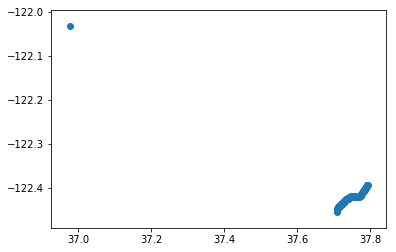

In [11]:
# Visualize the possible bus stops

X_stop = []
Y_stop = []

for i, j in stop_address_dict.items():
    #print(i,j[0],j[1])
    X_stop.append(j[0])
    Y_stop.append(j[1])
    
plt.scatter(X_stop,Y_stop)
plt.show()

One stop has weird position. Try to correct this:

In [12]:
#gmaps.geocode('MISSION ST & HIGHLAND AVE, CA')[0]['geometry']['location']
gmaps.geocode('MISSION ST, HIGHLAND AVE, CA')[0]['geometry']['location']
stop_address_dict['MISSION ST & HIGHLAND AVE, CA'] \
= [gmaps.geocode('MISSION ST, HIGHLAND AVE, CA')[0]['geometry']['location']['lat'],
  gmaps.geocode('MISSION ST, HIGHLAND AVE, CA')[0]['geometry']['location']['lng']]

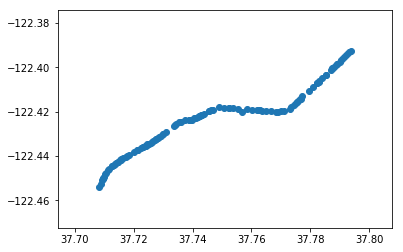

In [13]:
# Visualize the possible bus stops again, looks good!

X_stop = []
Y_stop = []
address_stop =[]

for i, j in stop_address_dict.items():
    #print(i,j[0],j[1])
    X_stop.append(j[0])
    Y_stop.append(j[1])
    address_stop.append(i)
    
plt.scatter(X_stop,Y_stop)
plt.show()

In [14]:
dataset_stop = pd.DataFrame({'address': address_stop, 'X': X_stop, 'Y': Y_stop})
dataset_stop.head()

,address,X,Y
0,"MISSION ST & ITALY AVE, CA",37.718478,-122.439536
1,"MISSION ST & NEW MONTGOMERY ST, CA",37.787456,-122.400523
2,"MISSION ST & 01ST ST, CA",37.789954,-122.397514
3,"MISSION ST & 20TH ST, CA",37.758640,-122.419077
4,"MISSION ST & FREMONT ST, CA",37.790457,-122.396707


In [15]:
employee_address_dict = {}

number = 0

for address in employee_address:
    geocode_result = gmaps.geocode(address)
    lat = geocode_result[0]['geometry']['location']['lat']
    long = geocode_result[0]['geometry']['location']['lng']
    
    employee_address_dict[address] = [lat,long]
    
    if (number % 50 == 0):
        print(number,address,[lat,long])
    number +=1

0 55 9th St, San Francisco, CA 94103, USA [37.7771493, -122.4151836]
50 179 Hamerton Ave, San Francisco, CA 94131, USA [37.7331862, -122.4376882]
100 115 Tiffany Ave, San Francisco, CA 94110, USA [37.7451048, -122.4210324]
150 901 Naples St, San Francisco, CA 94112, USA [37.7152083, -122.4351673]
200 40 Lippard Ave, San Francisco, CA 94131, USA [37.73504, -122.4357168]
250 436 9th St, San Francisco, CA 94103, USA [37.7719738, -122.4096702]
300 165 Bertita St, San Francisco, CA 94112, USA [37.71860849999999, -122.4402433]
350 21 Roanoke St, San Francisco, CA 94131, USA [37.7364764, -122.4309867]
400 162B Sussex St, San Francisco, CA 94131, USA [37.7367893, -122.4359262]
450 1906 Baker St, San Francisco, CA 94115, USA [37.788885, -122.4437281]
500 376 Hanover St, San Francisco, CA 94112, USA [37.7089503, -122.4444016]
550 2150 Alemany Blvd, San Francisco, CA 94112, USA [37.7183079, -122.4421467]
600 150 Charter Oak Ave, San Francisco, CA 94124, USA [37.7351601, -122.4048536]
650 2410 Uni

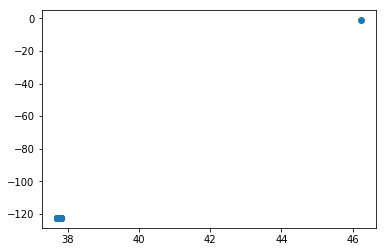

In [16]:
# Visualize the possible employee addresses

X_employee = []
Y_employee = []

for i, j in employee_address_dict.items():
    #print(i,j[0],j[1])
    X_employee.append(j[0])
    Y_employee.append(j[1])
    
plt.scatter(X_employee,Y_employee)
plt.show()

In [17]:
sorted(employee_address_dict.items(), key=lambda x: x[1], reverse = True)[:1]

[('20 Marsilly St, San Francisco, CA 94112, USA',
  [46.22992499999999, -1.138309])]

In [18]:
gmaps.geocode('20 Marsilly St, San Francisco, CA 94112, USA')[0]['geometry']['location']

{'lat': 46.22992499999999, 'lng': -1.138309}

In [19]:
# I have to drop this one:

del employee_address_dict['20 Marsilly St, San Francisco, CA 94112, USA']

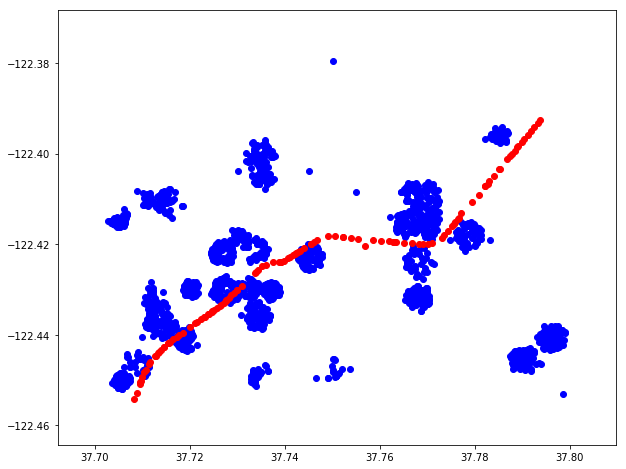

In [20]:
# Visualize the possible employee addresses again

X_employee = []
Y_employee = []
address_employee = []

for i, j in employee_address_dict.items():
    #print(i,j[0],j[1])
    address_employee.append(i)
    X_employee.append(j[0])
    Y_employee.append(j[1])
    

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_employee,Y_employee, color ='b')
ax.scatter(X_stop,Y_stop, color = 'r')
plt.show()

In [21]:
dataset = pd.DataFrame({'address': address_employee, 'X': X_employee,'Y': Y_employee})
dataset1 = dataset[['X','Y']]
dataset.head()

,address,X,Y
0,"55 9th St, San Francisco, CA 94103, USA",37.777149,-122.415184
1,"121 Accacia St, Daly City, CA 94014, USA",37.706304,-122.414926
2,"313 Potrero Ave, San Francisco, CA 94103, USA",37.765520,-122.407296
3,"18 Alexander Ave, Daly City, CA 94014, USA",37.704256,-122.451196
4,"2077 Thomas Ave, San Francisco, CA 94124, USA",37.735175,-122.400088


### K-Mean Clustering

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(dataset1).predict(dataset1)

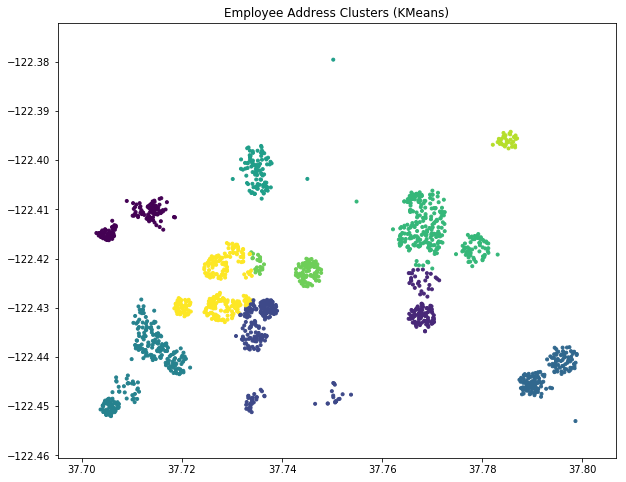

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset1.iloc[:, 0], dataset1.iloc[:, 1], c=kmeans, marker=".")
ax.set_title('Employee Address Clusters (KMeans)')
plt.show()

### GMM Clustering

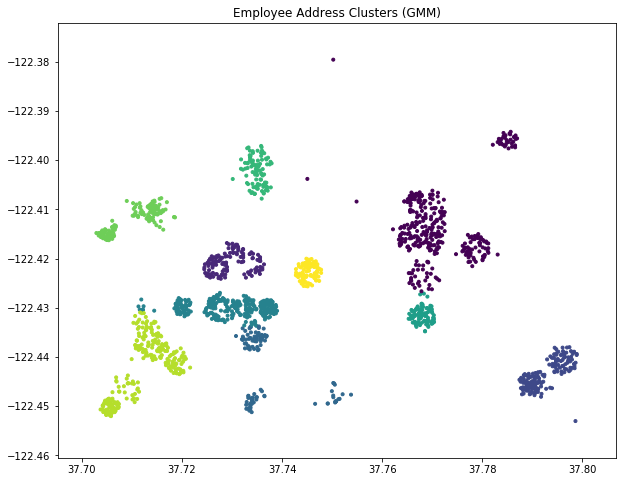

In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10).fit(dataset1).predict(dataset1)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset1.iloc[:, 0], dataset1.iloc[:, 1], c=gmm, marker=".")
ax.set_title('Employee Address Clusters (GMM)')
plt.show()

### K-mean based choices

In [25]:
dataset.iloc[kmeans == 0].address

1                121 Accacia St, Daly City, CA 94014, USA
16              2900 Geneva Ave, Daly City, CA 94014, USA
39             98 Elliot St, San Francisco, CA 94134, USA
43         683 Campbell Ave, San Francisco, CA 94134, USA
56      1115 Visitacion Ave, San Francisco, CA 94134, USA
69          500 Raymond Ave, San Francisco, CA 94134, USA
79              875 Schwerin St, Daly City, CA 94014, USA
95             780 Delta St, San Francisco, CA 94134, USA
102            123 A Oriente St, Daly City, CA 94014, USA
116      941 Visitacion Ave, San Francisco, CA 94134, USA
117              208 Accacia St, Daly City, CA 94014, USA
122           312 Elliot St, San Francisco, CA 94134, USA
130              148 Oriente St, Daly City, CA 94014, USA
131              166 Accacia St, Daly City, CA 94014, USA
145             852 Schwerin St, Daly City, CA 94014, USA
149          269 Arleta Ave, San Francisco, CA 94134, USA
162             2925 Geneva Ave, Daly City, CA 94014, USA
174           

In [26]:
group = 1
sub_dataset = dataset.iloc[kmeans == group].reset_index()
distance_min = float('inf')

for i in range(dataset_stop.shape[0]):
    X1 = dataset_stop.X[i]
    Y1 = dataset_stop.Y[i]
    distance = 0
    
    for j in range(sub_dataset.shape[0]):
        #print(i,sub_dataset.X[j], sub_dataset.Y[j])
        X2 = sub_dataset.X[j]
        Y2 = sub_dataset.Y[j]
        distance += ((X1-X2)**2. + (Y1-Y2)**2.)**0.5
        
    if distance < distance_min:
        i_min = i
        distance_min = distance
        print(i_min, distance_min, X1, Y1)


0 6.163490394195174 37.7184779 -122.4395356
1 4.314337766406645 37.7874561 -122.4005234
3 1.774049184313949 37.7586404 -122.4190771
5 1.271056179187892 37.7701527 -122.4199408
6 1.2311706773762114 37.7690631 -122.4200723
66 1.2304153441585213 37.7682842 -122.4200074


In [27]:
dataset_stop.iloc[i_min].X

37.7682842

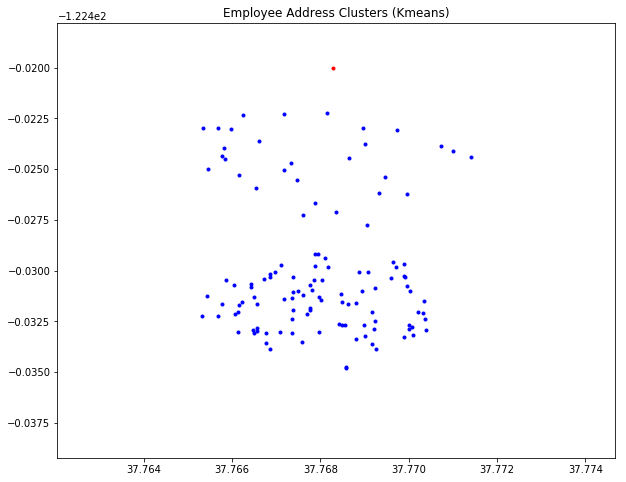

In [28]:
# test one group

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset1.iloc[kmeans==1].X, dataset1.iloc[kmeans==1].Y, c='b', marker=".")
ax.scatter(dataset_stop.iloc[i_min].X, dataset_stop.iloc[i_min].Y, c='r', marker=".")
ax.set_title('Employee Address Clusters (Kmeans)')
plt.show()

In [29]:
stop_list = []
for group in range(10):
    sub_dataset = dataset.iloc[kmeans == group].reset_index()
    distance_min = float('inf')

    for i in range(dataset_stop.shape[0]):
        X1 = dataset_stop.X[i]
        Y1 = dataset_stop.Y[i]
        distance = 0

        for j in range(sub_dataset.shape[0]):
            #print(i,sub_dataset.X[j], sub_dataset.Y[j])
            X2 = sub_dataset.X[j]
            Y2 = sub_dataset.Y[j]
            distance += ((X1-X2)**2. + (Y1-Y2)**2.)**0.5

        if distance < distance_min:
            i_min = i
            distance_min = distance
    print(i_min, distance_min, X1, Y1)
    stop_list.append([i_min,X1,Y1,distance_min])

62 3.9073518884990266 37.7756099 -122.4155178
66 1.2304153441585213 37.7756099 -122.4155178
17 2.2388252662075665 37.7756099 -122.4155178
84 5.315550858028519 37.7756099 -122.4155178
48 1.9922938508000134 37.7756099 -122.4155178
102 2.1160959519029117 37.7756099 -122.4155178
50 2.1790049844272397 37.7756099 -122.4155178
55 0.4387681839418541 37.7756099 -122.4155178
73 0.16779137869333058 37.7756099 -122.4155178
62 2.0733855789324216 37.7756099 -122.4155178


In [30]:
np.array(stop_list)[:,0]

array([ 62.,  66.,  17.,  84.,  48., 102.,  50.,  55.,  73.,  62.])

In [31]:
dataset_stop.iloc[np.array(stop_list)[:,0]]

,address,X,Y
62,"MISSION ST & ADMIRAL AVE, CA",37.729844,-122.430177
66,"MISSION ST & 14TH ST, CA",37.768284,-122.420007
17,"MISSION ST & TRUMBULL ST, CA",37.730891,-122.429259
84,"MISSION ST & 12TH ST, CA",37.773067,-122.418720
48,"MISSION ST & POPE ST, CA",37.715446,-122.441834
102,"MISSION ST & POWERS AVE, CA",37.746186,-122.419524
50,"MISSION ST & 11TH ST, CA",37.774332,-122.417137
55,"MISSION ST & 29TH ST, CA",37.744038,-122.420915
73,"MISSION ST & SHAW ALY, CA",37.788987,-122.398586
62,"MISSION ST & ADMIRAL AVE, CA",37.729844,-122.430177


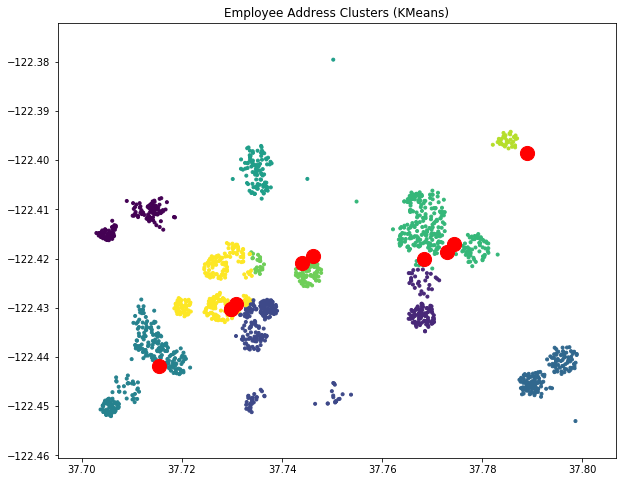

In [32]:
# choice 10 stops

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset1.iloc[:, 0], dataset1.iloc[:, 1], c=kmeans, marker=".")
ax.scatter(dataset_stop.iloc[np.array(stop_list)[:,0]].X, 
           dataset_stop.iloc[np.array(stop_list)[:,0]].Y, c='r', marker="o", s= 200)
ax.set_title('Employee Address Clusters (KMeans)')
plt.show()

### GMM based choices

In [33]:
stop_list = []
for group in range(10):
    sub_dataset = dataset.iloc[gmm == group].reset_index()
    distance_min = float('inf')

    for i in range(dataset_stop.shape[0]):
        X1 = dataset_stop.X[i]
        Y1 = dataset_stop.Y[i]
        distance = 0

        for j in range(sub_dataset.shape[0]):
            #print(i,sub_dataset.X[j], sub_dataset.Y[j])
            X2 = sub_dataset.X[j]
            Y2 = sub_dataset.Y[j]
            distance += ((X1-X2)**2. + (Y1-Y2)**2.)**0.5

        if distance < distance_min:
            i_min = i
            distance_min = distance
    print(i_min, distance_min, X1, Y1)
    stop_list.append([i_min,X1,Y1,distance_min])

50 3.327263636437153 37.7756099 -122.4155178
78 0.9708401079887486 37.7756099 -122.4155178
84 5.315550858028519 37.7756099 -122.4155178
21 1.4987232107136181 37.7756099 -122.4155178
83 1.9013091664840884 37.7756099 -122.4155178
6 1.102237063647446 37.7756099 -122.4155178
102 2.060184249654328 37.7756099 -122.4155178
62 3.9073518884990266 37.7756099 -122.4155178
48 1.9057835594302193 37.7756099 -122.4155178
55 0.24236705648029797 37.7756099 -122.4155178


In [34]:
dataset_stop.iloc[np.array(stop_list)[:,0]]

,address,X,Y
50,"MISSION ST & 11TH ST, CA",37.774332,-122.417137
78,"MISSION ST & COLLEGE AVE, CA",37.735306,-122.424806
84,"MISSION ST & 12TH ST, CA",37.773067,-122.418720
21,"MISSION ST & THERESA ST, CA",37.727717,-122.432404
83,"MISSION ST & NEY ST, CA",37.730010,-122.430116
6,"MISSION ST & ERIE ST, CA",37.769063,-122.420072
102,"MISSION ST & POWERS AVE, CA",37.746186,-122.419524
62,"MISSION ST & ADMIRAL AVE, CA",37.729844,-122.430177
48,"MISSION ST & POPE ST, CA",37.715446,-122.441834
55,"MISSION ST & 29TH ST, CA",37.744038,-122.420915


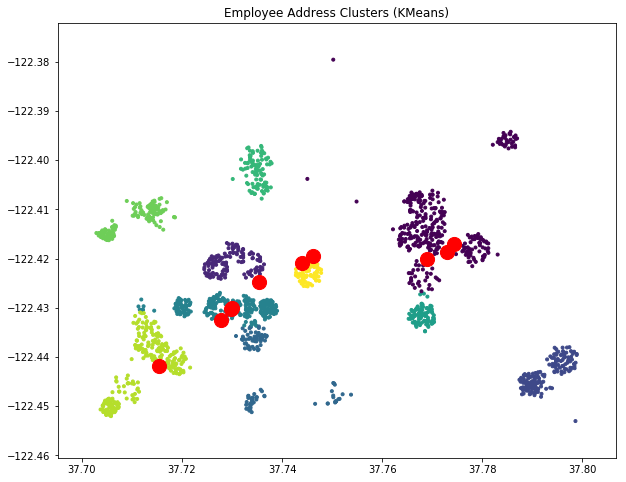

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset1.iloc[:, 0], dataset1.iloc[:, 1], c=gmm, marker=".")
ax.scatter(dataset_stop.iloc[np.array(stop_list)[:,0]].X, 
           dataset_stop.iloc[np.array(stop_list)[:,0]].Y, c='r', marker="o", s= 200)
ax.set_title('Employee Address Clusters (KMeans)')
plt.show()

In [36]:
#origin =  '206 Lisbon St, San Francisco, CA 94112, USA'
#destination = 'MISSION ST & RANDALL ST CA'

#distance1 = gmaps.distance_matrix(origins=origin, destinations=destination, mode='walking')
#float(distance1['rows'][0]['elements'][0]['distance']['text'].split(' ')[0])